In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image')

data = np.array(data)
labels = np.array(labels)

In [3]:
type(labels)

numpy.ndarray

In [4]:
type(data)

numpy.ndarray

In [6]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [7]:
len(labels)

39209

In [8]:
type(labels[0])

numpy.int32

In [10]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [12]:
y_test

array([26, 15, 13, ...,  8,  7, 20])

In [21]:
print(X_train.shape)
print(X_train.shape[:])
print(X_train.shape[1:])

(31367, 30, 30, 3)
(31367, 30, 30, 3)
(30, 30, 3)


In [13]:
len(y_test)

7842

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
len(y_test)

7842

In [18]:
y_test.shape

(7842, 43)

In [19]:
y_train.shape

(31367, 43)

# Building a CNN model

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training and validating the model

In [24]:
epochs = 15
# history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 74s 2ms/step - loss: 2.7751 - accuracy: 0.3229 - val_loss: 1.2828 - val_accuracy: 0.6479
Epoch 2/15
31367/31367 [==============================] - 73s 2ms/step - loss: 1.1953 - accuracy: 0.6469 - val_loss: 0.4936 - val_accuracy: 0.8818
Epoch 3/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.7884 - accuracy: 0.7589 - val_loss: 0.3030 - val_accuracy: 0.9199
Epoch 4/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.5938 - accuracy: 0.8183 - val_loss: 0.2325 - val_accuracy: 0.9329
Epoch 5/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.4466 - accuracy: 0.8667 - val_loss: 0.1770 - val_accuracy: 0.9459
Epoch 6/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.3537 - accuracy: 0.8941 - val_loss: 0.1355 - val_accuracy: 0.9611
Epoch 7/15
31367/31367 [==============================] - 73s 2ms/ste

it took 20 minutes for training


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 74s 2ms/step - loss: 2.7751 - accuracy: 0.3229 - val_loss: 1.2828 - val_accuracy: 0.6479
Epoch 2/15
31367/31367 [==============================] - 73s 2ms/step - loss: 1.1953 - accuracy: 0.6469 - val_loss: 0.4936 - val_accuracy: 0.8818
Epoch 3/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.7884 - accuracy: 0.7589 - val_loss: 0.3030 - val_accuracy: 0.9199
Epoch 4/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.5938 - accuracy: 0.8183 - val_loss: 0.2325 - val_accuracy: 0.9329
Epoch 5/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.4466 - accuracy: 0.8667 - val_loss: 0.1770 - val_accuracy: 0.9459
Epoch 6/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.3537 - accuracy: 0.8941 - val_loss: 0.1355 - val_accuracy: 0.9611
Epoch 7/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.2815 - accuracy: 0.9155 - val_loss: 0.1054 - val_accuracy: 0.9713
Epoch 8/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.2533 - accuracy: 0.9238 - val_loss: 0.0914 - val_accuracy: 0.9746
Epoch 9/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.2480 - accuracy: 0.9260 - val_loss: 0.0901 - val_accuracy: 0.9756
Epoch 10/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.2180 - accuracy: 0.9338 - val_loss: 0.0811 - val_accuracy: 0.9762
Epoch 11/15
31367/31367 [==============================] - 72s 2ms/step - loss: 0.2096 - accuracy: 0.9397 - val_loss: 0.0819 - val_accuracy: 0.9778
Epoch 12/15
31367/31367 [==============================] - 70s 2ms/step - loss: 0.1964 - accuracy: 0.9413 - val_loss: 0.0690 - val_accuracy: 0.9815
Epoch 13/15
31367/31367 [==============================] - 64s 2ms/step - loss: 0.2039 - accuracy: 0.9419 - val_loss: 0.0600 - val_accuracy: 0.9853
Epoch 14/15
31367/31367 [==============================] - 71s 2ms/step - loss: 0.1782 - accuracy: 0.9492 - val_loss: 0.0884 - val_accuracy: 0.9755
Epoch 15/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.1771 - accuracy: 0.9506 - val_loss: 0.0631 - val_accuracy: 0.9833

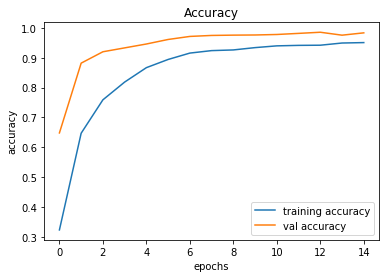

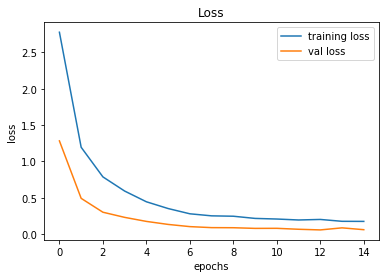

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Testing our model with test dataset

In [26]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test['ClassId'].values
imgs = y_test['Path'].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

pred = model.predict_classes(X_test)

# accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9440221694378464

In [27]:
model.save('traffic_classifier.h5')